<a href="https://colab.research.google.com/github/wlg100/numseqcont_circuit_expms/blob/main/nb_templates/circuit_expms_template.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" align="left"/></a>&nbsp;or in a local notebook.

# Change Inputs Here

In [1]:
task = "numwords"  # choose: numerals, numwords, months
prompt_types = ['done', 'lost', 'names']
num_samps_per_ptype = 128 #768 512

model_name = "gpt2-small"

save_files = True

# Setup

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pickle

In [3]:
%pip install git+https://github.com/neelnanda-io/TransformerLens.git

  Cloning https://github.com/neelnanda-io/TransformerLens.git to /tmp/pip-req-build-3u2msttx
  Running command git clone --filter=blob:none --quiet https://github.com/neelnanda-io/TransformerLens.git /tmp/pip-req-build-3u2msttx
  Resolved https://github.com/neelnanda-io/TransformerLens.git to commit 829084a53836c5b8b388aa37a5ffce73b6371712
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from transformer_lens import HookedTransformer
import torch
torch.set_grad_enabled(False)  # turn automatic differentiation off

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
!git clone https://github.com/wlg1/seqcont_circ_expms.git

Cloning into 'seqcont_circ_expms'...
remote: Enumerating objects: 470, done.
remote: Counting objects: 100% (470/470), done.
remote: Compressing objects: 100% (244/244), done.
remote: Total 470 (delta 277), reused 399 (delta 209), pack-reused 0
Receiving objects: 100% (470/470), 15.15 MiB | 18.38 MiB/s, done.
Resolving deltas: 100% (277/277), done.


In [6]:
%cd seqcont_circ_expms/src/attn_pats

/content/seqcont_circ_expms/src/attn_pats


In [7]:
from viz_attn_pat import *

# Load Model and Dataset

## Model

Decide which model to use (eg. gpt2-small vs -medium)

In [8]:
model = HookedTransformer.from_pretrained(
    "gpt2-small",
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Loaded pretrained model gpt2-small into HookedTransformer


## Dataset

In [9]:
prompts_list = []

for i in prompt_types:
    file_name = f'/content/seqcont_circ_expms/data/{task}/{task}_prompts_{i}.pkl'
    with open(file_name, 'rb') as file:
        filelist = pickle.load(file)

    print(filelist[0]['text'])
    # change this to less if have CUDA have out of memory issues
    prompts_list += filelist [:num_samps_per_ptype] #768 512 256 128

prompts = [prompt['text'] for prompt in prompts_list]

Van done in one. Hat done in two. Ring done in three. Desk done in four. Sun done in
Oil lost in one. Apple lost in two. Tree lost in three. Snow lost in four. Apple lost in
Marcus born in one. Victoria born in two. George born in three. Brandon born in four. Jamie born in


We need to use 128 because we are saving local_cache, which is a lot of memory even on an A100.

In [10]:
tokens = model.to_tokens(prompts, prepend_bos=True)
# tokens = tokens.cuda() # Move the tokens to the GPU

# get the cache to get attention patterns from
original_logits, local_cache = model.run_with_cache(tokens) # Run the model and cache all activations

# Functions

## Index attn pat fns

In [19]:
# Tokenized sentence is stored in token_list and the tokens you are interested in are token1 and token2
token1 = " three"
token2 = " two"

local_tokens = tokens[0]
token_list = model.to_str_tokens(local_tokens)

In [20]:
def get_attn_val(token_list, token1, token2, layer, head_index):
    # Find the indices of the tokens in the tokenized sentence
    try:
        query_ind = token_list.index(token1)
        key_ind = token_list.index(token2)
    except ValueError as e:
        print(f"Token not found: {e}")
    else:
        # print(f"The index of '{token1}' is {query_ind}")
        # print(f"The index of '{token2}' is {key_ind}")

        patterns = local_cache["attn", layer][:, head_index].mean(dim=0)
        heatmap_value = patterns[query_ind, key_ind]
        print(f'The avg heatmap value at "{token1}" "{token2}" is {heatmap_value} for {layer}.{head_index}')

get_attn_val(token_list, token1, token2, 4, 4)

The avg heatmap value at " three" " two" is 0.17823219299316406 for 4.4


In [21]:
def get_attn_val_fromEnd(token_list, token2, layer, head_index):
    # Find the indices of the tokens in the tokenized sentence
    try:
        query_ind = -1
        key_ind = token_list.index(token2)
    except ValueError as e:
        print(f"Token not found: {e}")
    else:
        # print(f"The index of '{token1}' is {query_ind}")
        # print(f"The index of '{token2}' is {key_ind}")

        patterns = local_cache["attn", layer][:, head_index].mean(dim=0)
        heatmap_value = patterns[query_ind, key_ind]
        print(f'The avg heatmap value at last token to "{token2}" is {heatmap_value} for {layer}.{head_index}')

get_attn_val_fromEnd(token_list, token1, 9, 1)
get_attn_val_fromEnd(token_list, token2, 9, 1)

The avg heatmap value at last token to " three" is 0.16834259033203125 for 9.1
The avg heatmap value at last token to " two" is 0.029443418607115746 for 9.1


In [22]:
get_ind(token_list, token1, token2, printInd=True)

The index of ' three' is 14
The index of ' two' is 9


(14, 9)

# Early heads

## Number Detection/Similar Type Heads

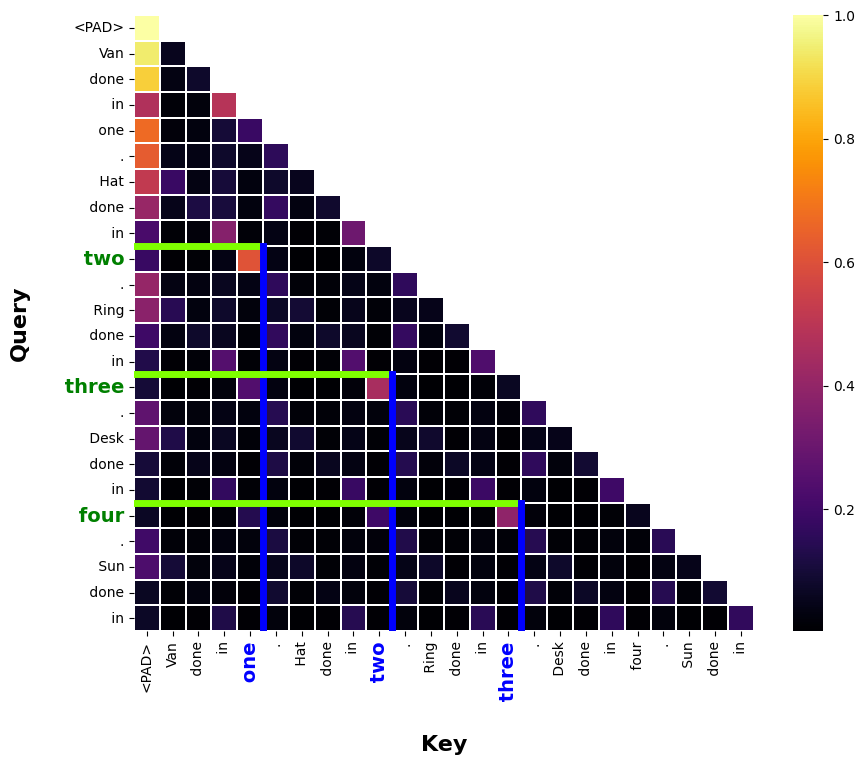

In [26]:
layer = 1
head_ind = 5
viz_attn_pat(
    model,
    tokens,
    local_cache,
    layer,
    head_ind,
    task,
    highlightLines = 'early',
    savePlotName = f'attnpat{layer}_{head_ind}_{task}'
)

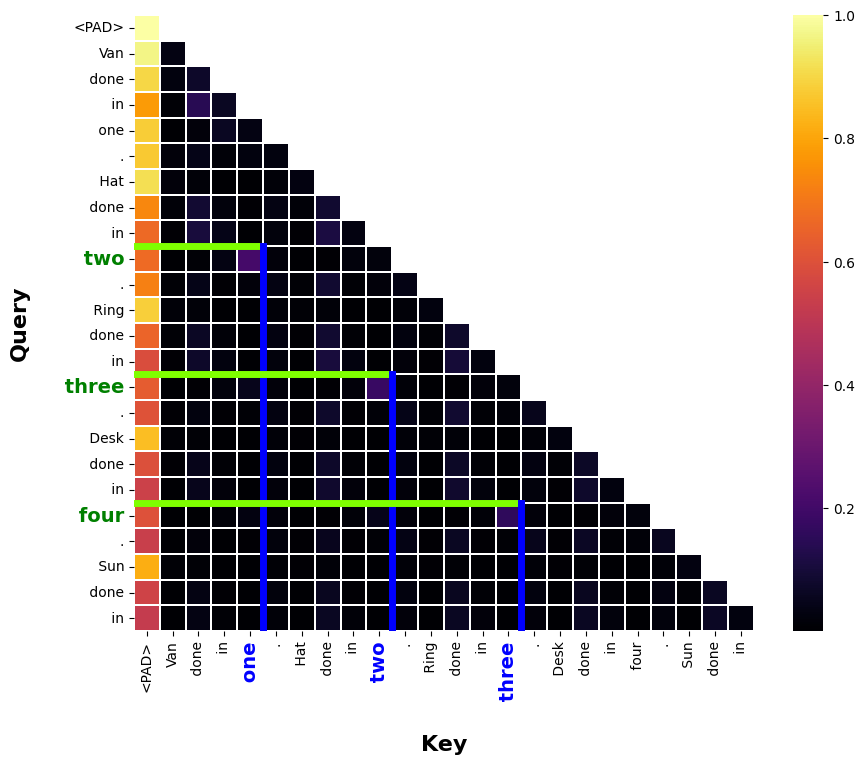

In [27]:
layer = 4
head_ind = 4
viz_attn_pat(
    model,
    tokens,
    local_cache,
    layer,
    head_ind,
    task,
    highlightLines = 'early',
    savePlotName = f'attnpat{layer}_{head_ind}_{task}'
)

Lighter/Warmer "sunnier" colors mean higher attention values.


## Duplicate Heads

In [28]:
def viz_attnPat_dupl(
    layer, head_index,
    highlightLines = True
):
    patterns = local_cache["attn", layer][:, head_index].mean(dim=0)
    patterns_np = patterns.cpu().numpy()

    str_tokens = model.to_str_tokens(tokens[0])
    str_tokens[0] = '<END>' # Rename the first token string as '<END>'

    # Create a mask for the cells above the diagonal
    mask = np.triu(np.ones_like(patterns_np, dtype=bool), k=1)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        patterns_np,
        xticklabels=str_tokens,
        yticklabels=str_tokens,
        # cmap='viridis',
        cmap = 'inferno',
        annot=False,
        fmt='.2f',
        linewidths=0.1,  # Set linewidth to create grid lines between cells
        linecolor='white',  # Set line color to white
        # cbar_kws={'label': 'Attention Weight'}
        mask=mask
    )

    ax.set_xlabel('Key', fontsize=16, fontweight='bold')
    ax.set_ylabel('Query', fontsize=16, fontweight='bold')

    if highlightLines:
        for i in range(0, 19):
            rect = patches.Rectangle((i, i), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            rect = patches.Rectangle((i, i+5), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            rect = patches.Rectangle((i, i+10), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.show()

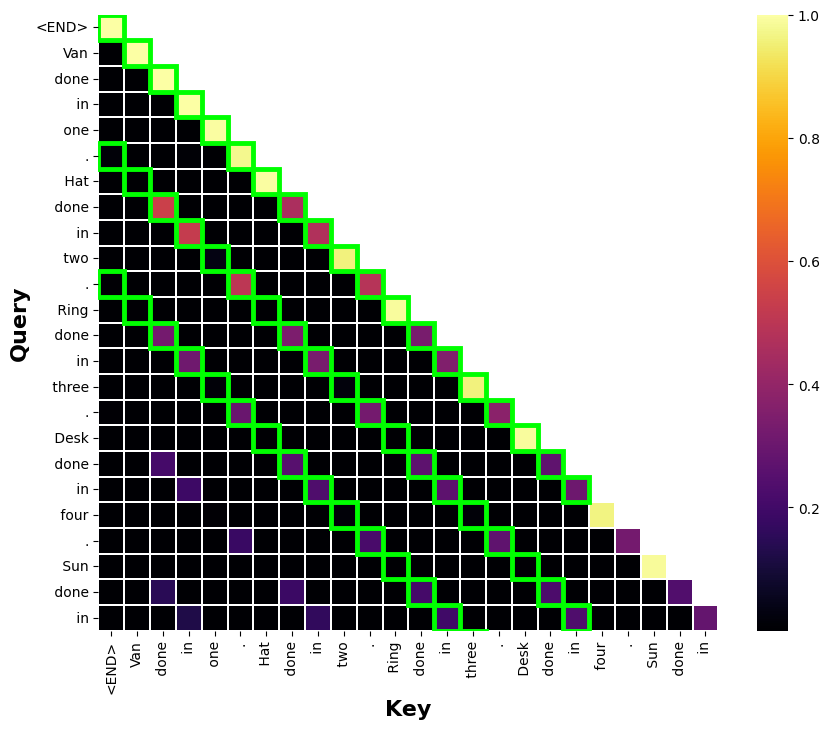

In [29]:
viz_attnPat_dupl(layer = 0, head_index = 1)

# Middle heads

Notice the last token in the sequence (last row) pays attention to the most recent seq members.

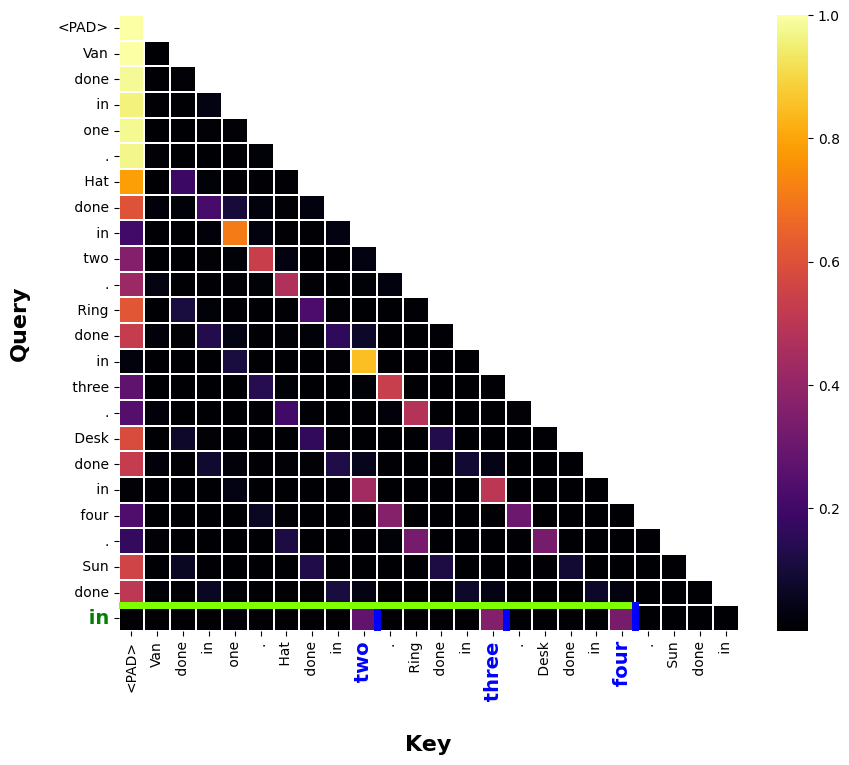

In [30]:
layer = 7
head_ind = 11
viz_attn_pat(
    model,
    tokens,
    local_cache,
    layer,
    head_ind,
    task,
    highlightLines = 'mid',
    savePlotName = f'attnpat{layer}_{head_ind}_{task}'
)

This pays attention to all numbers except the first seq member; albeit, not that strong for each. More recent seq members are stronger.

# Late heads

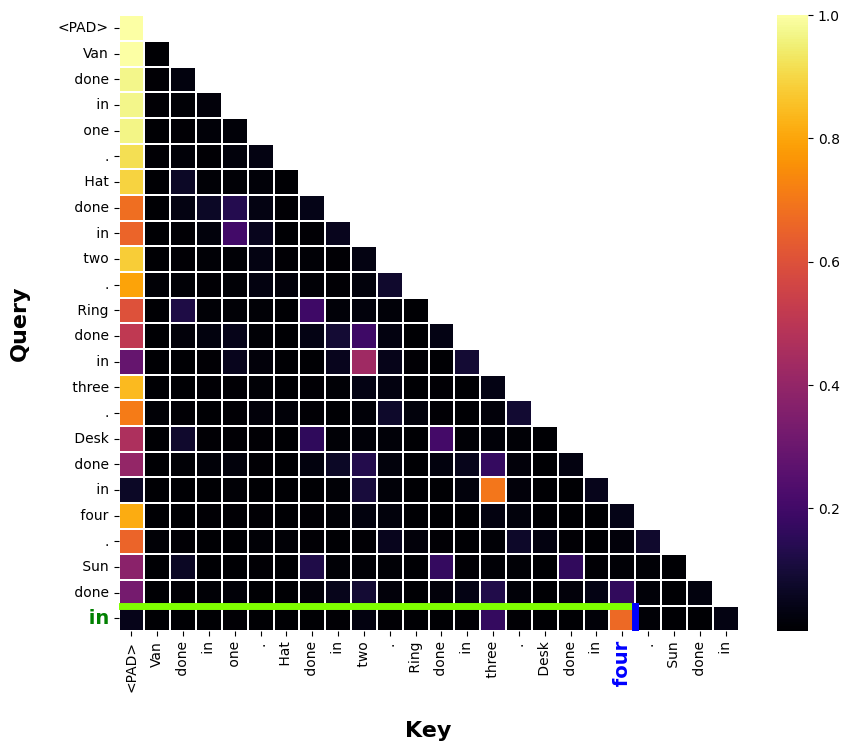

In [31]:
layer = 9
head_ind = 1
viz_attn_pat(
    model,
    tokens,
    local_cache,
    layer,
    head_ind,
    task,
    highlightLines = 'late',
    savePlotName = f'attnpat{layer}_{head_ind}_{task}'
)

The last row (token) pays attention a lot to ONLY the most recent number token.

# Download files from nb

In [ ]:
from google.colab import files
if save_files:
    for layer, head_ind in [(1,5), (4,4), (7,11), (9,1)]:
        savePlotName = f'attnpat{layer}_{head_ind}_{task}'
        files.download(savePlotName + '.png')